In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(r"/content/Diwali Sales Data.csv", encoding = "latin1")
df.shape

(11251, 15)

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [17]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

# **Drop Unnamed Column & Null Values**

In [20]:
df.drop(["Status" ,"unnamed1"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [24]:
df.dropna(inplace=True)
df.shape

(11239, 13)

# **Changes in DataSet**

In [25]:
df["Amount"] = df["Amount"].astype("int")

In [26]:
df["Amount"].dtypes

dtype('int64')

# **EDA**


# Gender

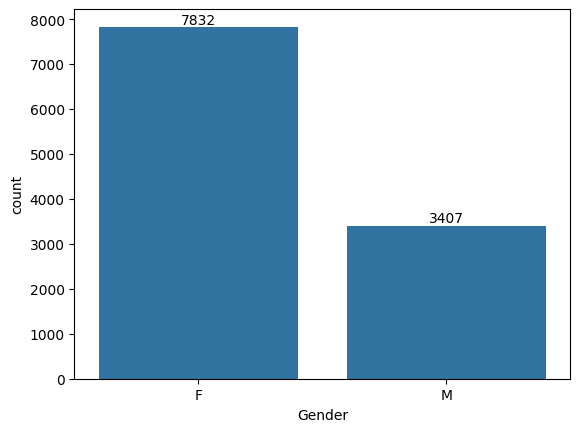

In [30]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

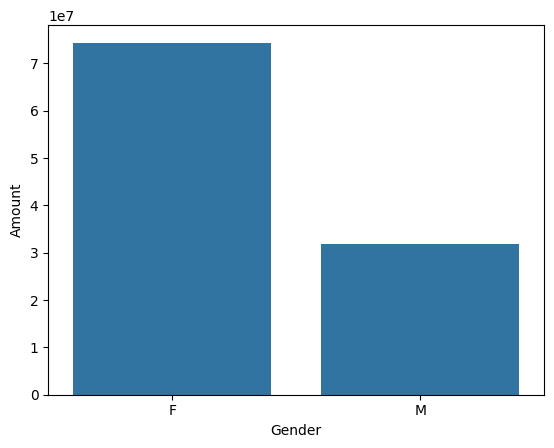

In [31]:
sales_gen = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by = "Amount", ascending=False)
sns.barplot(x= "Gender", y= "Amount", data = sales_gen)

In [ ]:
# From above graphs we can see that most of the buyers are females
# and even the purchasing power of female is greater then man

# Age


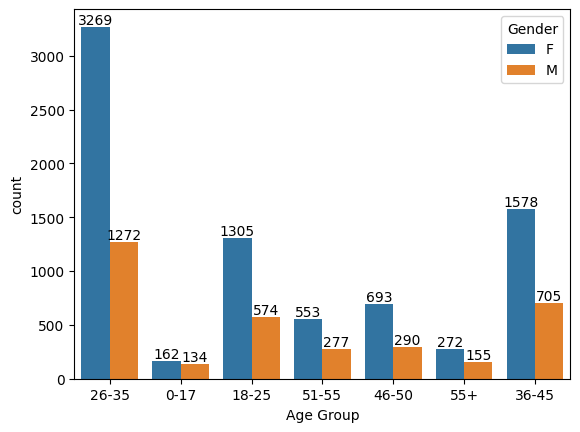

In [33]:
ax = sns.countplot(data = df, x = "Age Group", hue = "Gender")
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

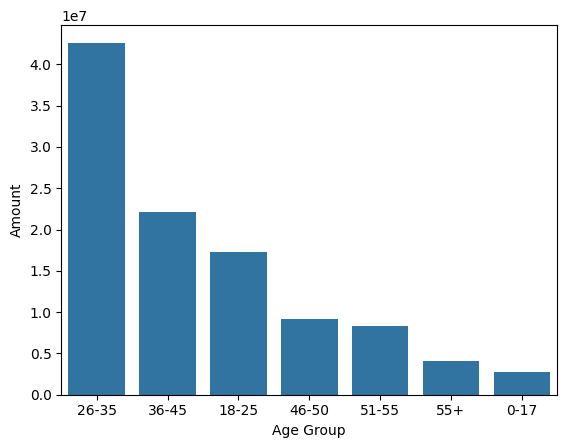

In [37]:
sales_age = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by = "Amount", ascending=False)
sns.barplot(x= "Age Group", y= "Amount", data = sales_age)

In [ ]:
# From above graphs we can see that most of the buyers are of age group 25-35 years female

# State

<Axes: xlabel='State', ylabel='Orders'>

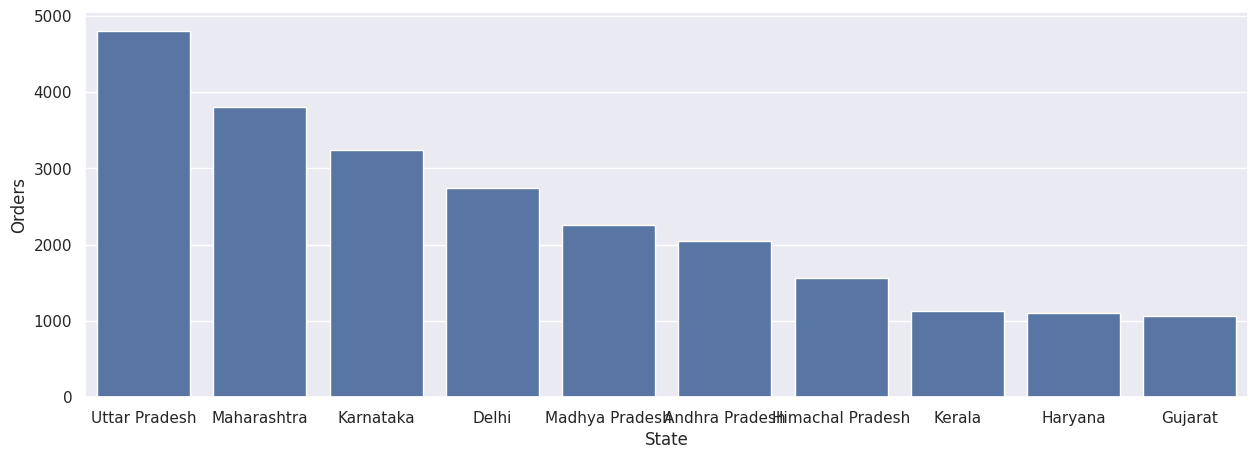

In [40]:
sales_state = df.groupby(["State"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(data = sales_state, x = "State", y = "Orders")

<Axes: xlabel='State', ylabel='Amount'>

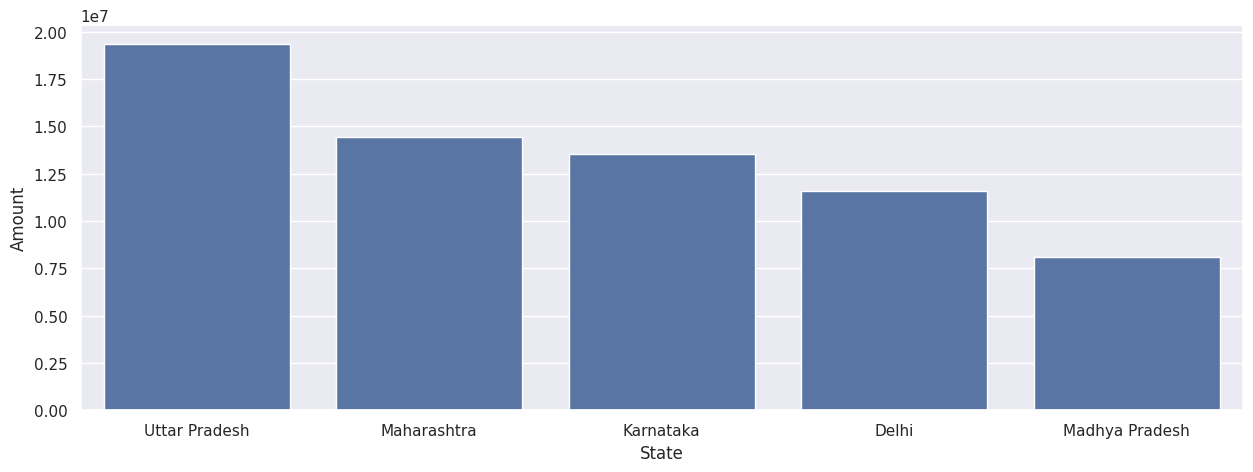

In [43]:
sales_state = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head()

sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(data = sales_state, x = "State", y = "Amount")

In [ ]:
# From above chart we can see that unexpectedly most of the orders are from uttar-pradesh
# Maharashtra and karnataka respectively but total sales/amount is from up, maharashtra and then karnataka

# Marital Status

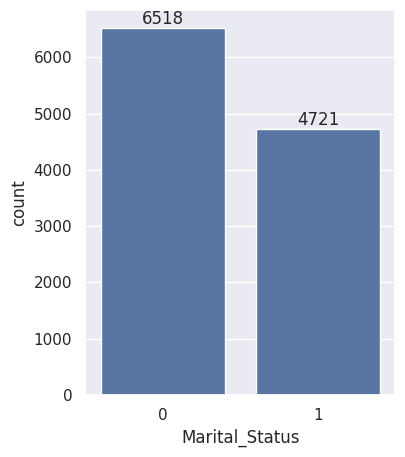

In [46]:
ax = sns.countplot(data = df, x = "Marital_Status")

sns.set(rc = {"figure.figsize":(3,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

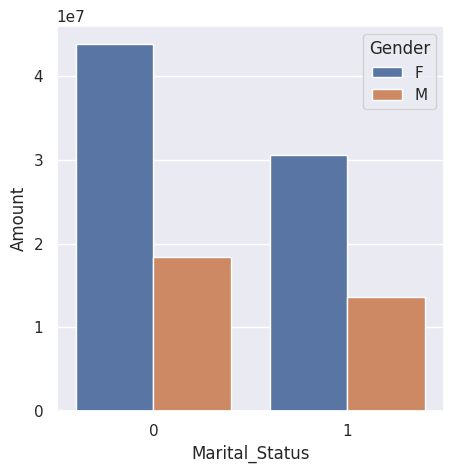

In [49]:
marit_statu = df.groupby(["Marital_Status","Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set({"figure.figsize":(5,5)})
sns.barplot(data = marit_statu, x ="Marital_Status", y = "Amount",  hue = "Gender")


In [ ]:
# From above chart we see that most of the buyers are married (Women) have high purchasing power

# Occupation

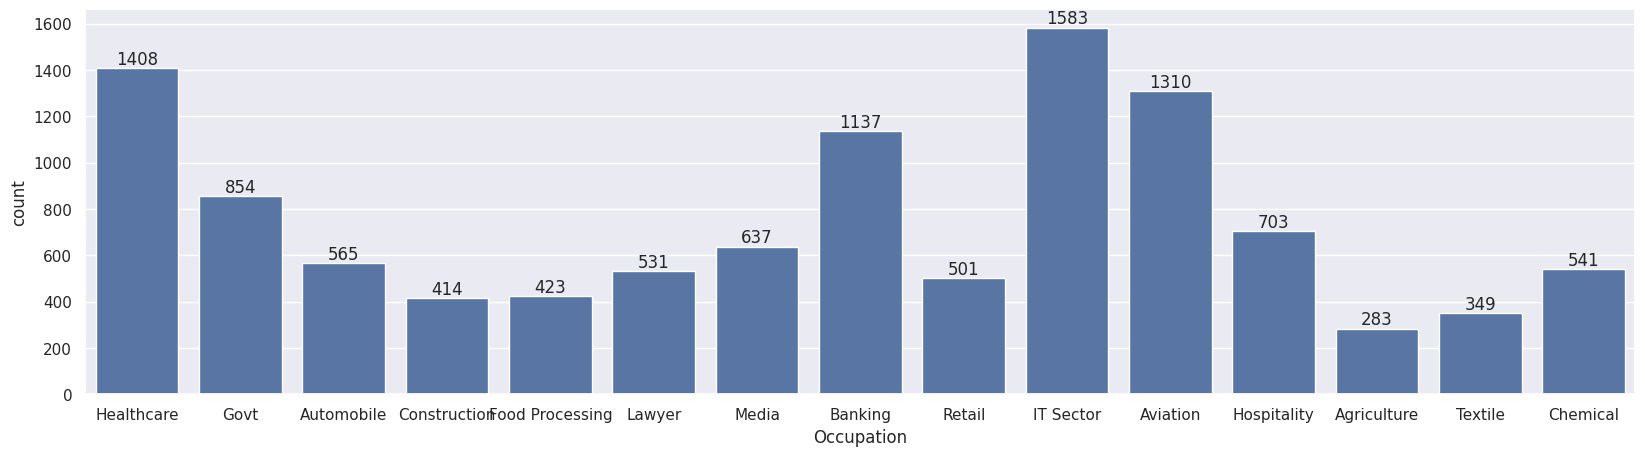

In [50]:
sns.set(rc = {"figure.figsize":(20,5)})
ax=sns.countplot(data = df, x= "Occupation")

for bars in ax.containers:
  ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

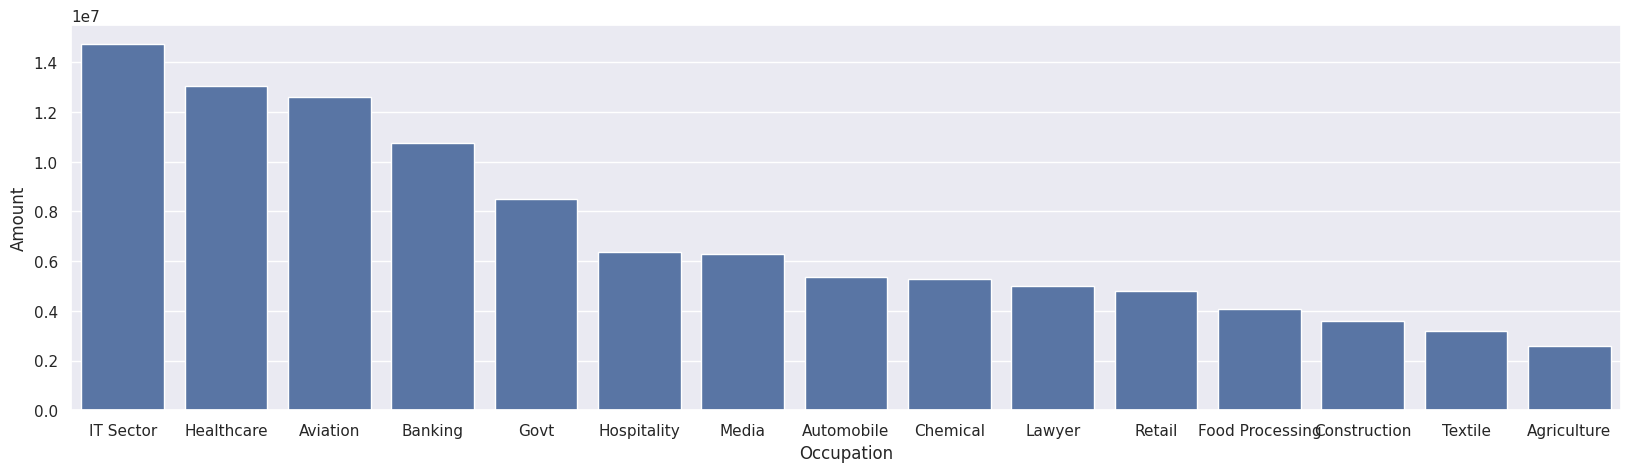

In [53]:
sales_state = df.groupby(["Occupation"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set({"figure.figsize":(20,5)})
sns.barplot(data = sales_state, x ="Occupation", y = "Amount")


In [ ]:
#From above charts we see that most of the buyers are working in IT, Aviation and Healthcare sector

# Product Category

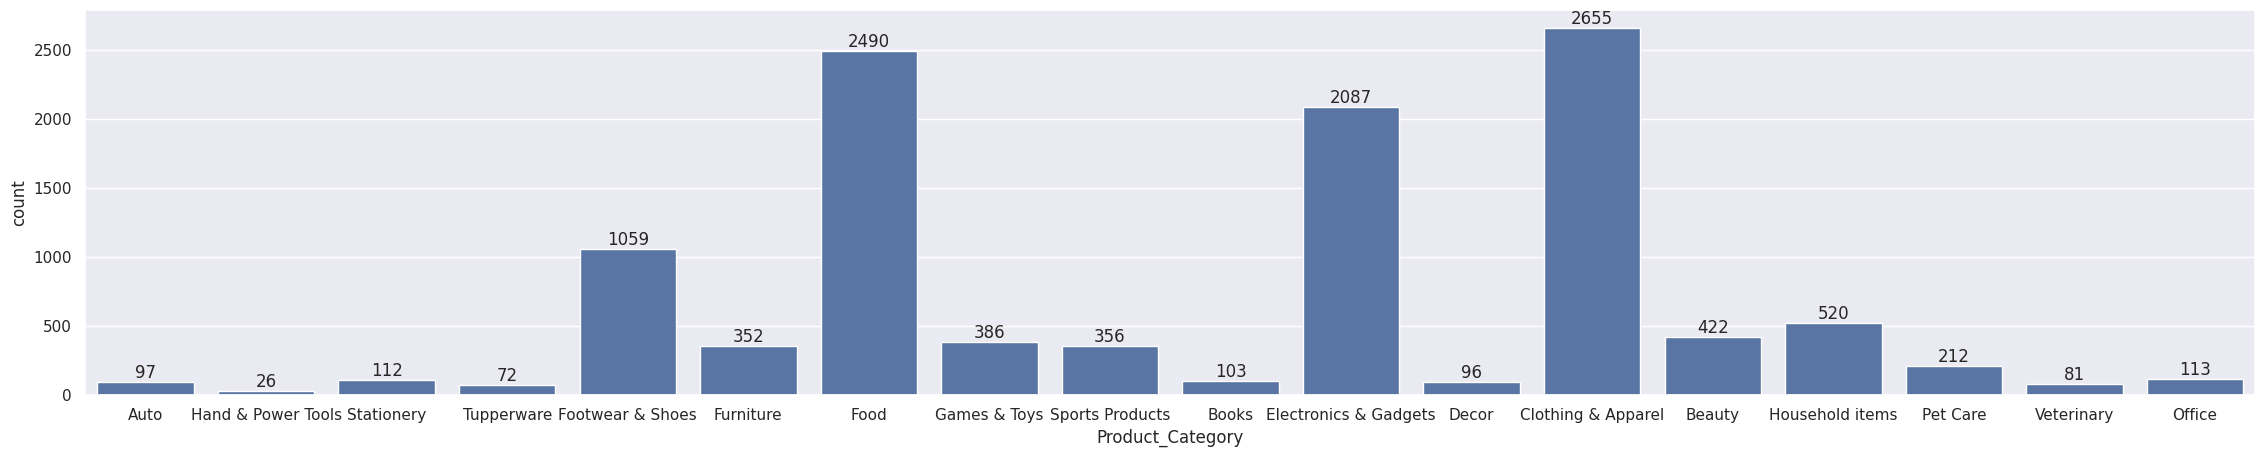

In [57]:
sns.set(rc = {"figure.figsize":(28,5)})
ax=sns.countplot(data = df, x= "Product_Category")

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

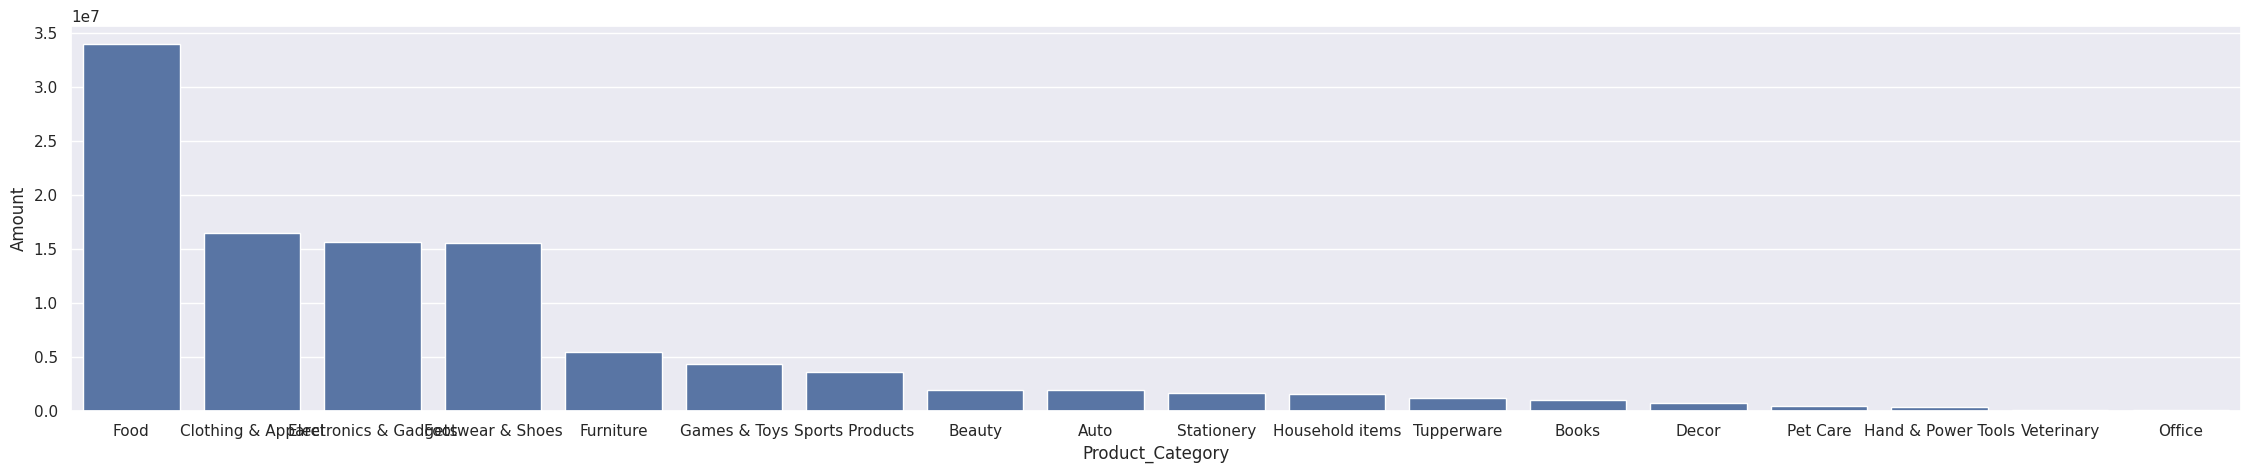

In [59]:
sales_state = df.groupby(["Product_Category"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set({"figure.figsize":(28,5)})
sns.barplot(data = sales_state, x ="Product_Category", y = "Amount")


In [59]:
# From above graphs we can see that most of the sold products are from Food, Footware and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

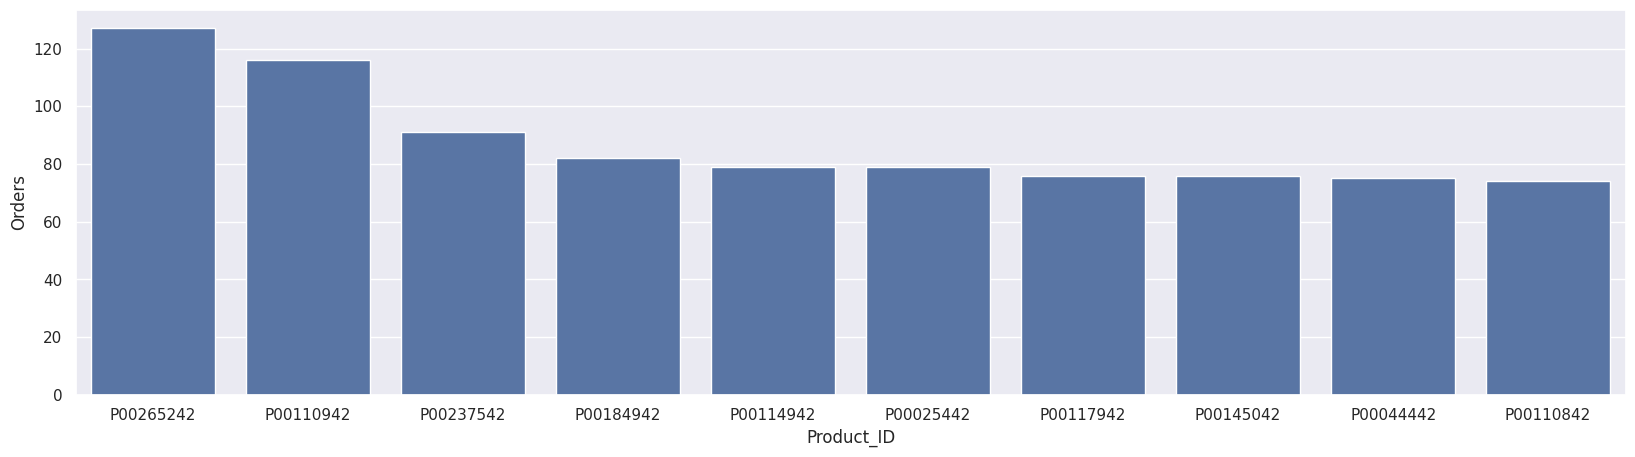

In [61]:
sales_state = df.groupby(["Product_ID"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set({"figure.figsize":(20,5)})
sns.barplot(data = sales_state, x ="Product_ID", y = "Orders")


<Axes: xlabel='Product_ID'>

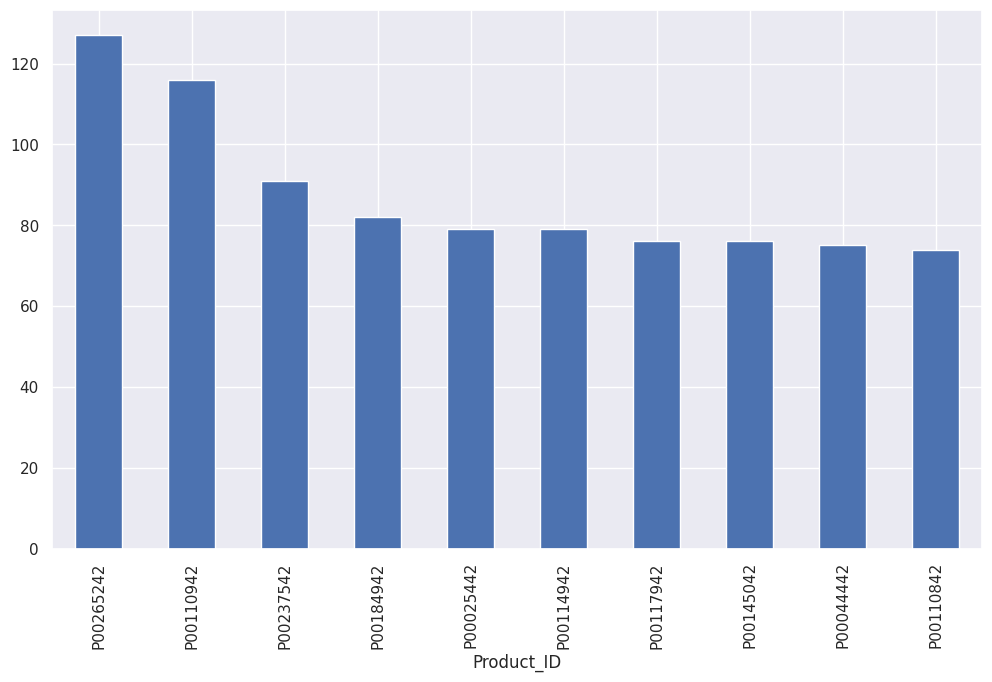

In [62]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby("Product_ID")["Orders"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "bar")


# **Conclusion:**


*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*